In [1]:
#加載單張圖片
from keras.preprocessing.image import img_to_array,load_img
from pathlib import Path

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
cur_path = Path.cwd()
print(cur_path)
pic='husky5.jpg'
pic1 = load_img(pic,target_size=(224,224))
print(pic1)

D:\AI\project\husky
<PIL.Image.Image image mode=RGB size=224x224 at 0x1E89F049C08>


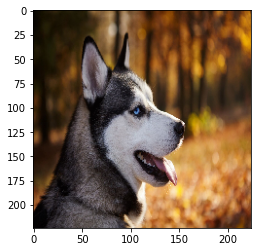

In [3]:
# 可視化第一張圖
from matplotlib import pyplot as plt
fig1  = plt.figure()
plt.imshow(pic1)

In [4]:
#圖片轉數組
pic1 = img_to_array(pic1)


In [5]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
import numpy as np

x = np.expand_dims(pic1,axis=0)
x = preprocess_input(x)
model_vgg = VGG16(weights='imagenet', include_top=False)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)

In [6]:
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder1 = "photos/husky/"
dirs1 = os.listdir(folder1)
#generate path for the images
img_path1 = []
for i in dirs1:
    if os.path.splitext(i)[1] == ".jpg":
        img_path1.append(i)
img_path1 = [folder1+"//"+i for i in img_path1]

#preprocess multiple images
features1 = np.zeros([len(img_path1),25088])
for i in range(len(img_path1)):
    feature_i = modelProcess(img_path1[i],model_vgg)
    print('preprocessed:',img_path1[i])
    features1[i] = feature_i

folder2 = "photos/wolf/"
dirs2 = os.listdir(folder2)
img_path2 = []
for i in dirs2:
    if os.path.splitext(i)[1] == ".jpg":
        img_path2.append(i)
img_path2 = [folder2+"//"+i for i in img_path2]
features2 = np.zeros([len(img_path2),25088])
for i in range(len(img_path2)):
    feature_i = modelProcess(img_path2[i],model_vgg)
    print('preprocessed:',img_path2[i])
    features2[i] = feature_i

#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(195)
y2 = np.ones(359)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: photos/husky///husky38.jpg
preprocessed: photos/husky///husky380.jpg
preprocessed: photos/husky///husky381.jpg
preprocessed: photos/husky///husky382.jpg
preprocessed: photos/husky///husky383.jpg
preprocessed: photos/husky///husky384.jpg
preprocessed: photos/husky///husky385.jpg
preprocessed: photos/husky///husky386.jpg
preprocessed: photos/husky///husky387.jpg
preprocessed: photos/husky///husky388.jpg
preprocessed: photos/husky///husky389.jpg
preprocessed: photos/husky///husky39.jpg
preprocessed: photos/husky///husky390.jpg
preprocessed: photos/husky///husky391.jpg
preprocessed: photos/husky///husky392.jpg
preprocessed: photos/husky///husky393.jpg
preprocessed: photos/husky///husky394.jpg
preprocessed: photos/husky///husky395.jpg
preprocessed: photos/husky///husky396.jpg
preprocessed: photos/husky///husky397.jpg
preprocessed: photos/husky///husky399.jpg
preprocessed: photos/husky///husky40.jpg
preprocessed: photos/husky///husky400.jpg
preprocessed: photos/husky///husky401

D:\Anaconda3\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


preprocessed: photos/husky///husky419.jpg
preprocessed: photos/husky///husky42.jpg
preprocessed: photos/husky///husky420.jpg
preprocessed: photos/husky///husky421.jpg
preprocessed: photos/husky///husky422.jpg
preprocessed: photos/husky///husky423.jpg
preprocessed: photos/husky///husky424.jpg
preprocessed: photos/husky///husky425.jpg
preprocessed: photos/husky///husky426.jpg
preprocessed: photos/husky///husky427.jpg
preprocessed: photos/husky///husky428.jpg
preprocessed: photos/husky///husky43.jpg
preprocessed: photos/husky///husky430.jpg
preprocessed: photos/husky///husky431.jpg
preprocessed: photos/husky///husky432.jpg
preprocessed: photos/husky///husky433.jpg
preprocessed: photos/husky///husky435.jpg
preprocessed: photos/husky///husky436.jpg
preprocessed: photos/husky///husky437.jpg
preprocessed: photos/husky///husky438.jpg
preprocessed: photos/husky///husky439.jpg
preprocessed: photos/husky///husky44.jpg
preprocessed: photos/husky///husky440.jpg
preprocessed: photos/husky///husky441

D:\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


preprocessed: photos/wolf///wolf48.jpg
preprocessed: photos/wolf///wolf480.jpg
preprocessed: photos/wolf///wolf481.jpg
preprocessed: photos/wolf///wolf482.jpg
preprocessed: photos/wolf///wolf483.jpg
preprocessed: photos/wolf///wolf484.jpg
preprocessed: photos/wolf///wolf487.jpg
preprocessed: photos/wolf///wolf488.jpg
preprocessed: photos/wolf///wolf489.jpg
preprocessed: photos/wolf///wolf49.jpg
preprocessed: photos/wolf///wolf490.jpg
preprocessed: photos/wolf///wolf491.jpg
preprocessed: photos/wolf///wolf493.jpg
preprocessed: photos/wolf///wolf494.jpg
preprocessed: photos/wolf///wolf495.jpg
preprocessed: photos/wolf///wolf496.jpg
preprocessed: photos/wolf///wolf499.jpg
preprocessed: photos/wolf///wolf5.jpg
preprocessed: photos/wolf///wolf50.jpg
preprocessed: photos/wolf///wolf500.jpg
preprocessed: photos/wolf///wolf501.jpg
preprocessed: photos/wolf///wolf504.jpg
preprocessed: photos/wolf///wolf505.jpg
preprocessed: photos/wolf///wolf506.jpg
preprocessed: photos/wolf///wolf508.jpg
prepr

In [7]:
#數據分離
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape, X.shape)

(443, 25088) (111, 25088) (554, 25088)


In [8]:
#建立MLP模型
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=25088))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
#模型求解參數配置
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
#模型訓練
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
443/443 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.8307
Epoch 2/50
443/443 [==============================] - 0s 305us/step - loss: 0.2061 - accuracy: 0.9503
Epoch 3/50
443/443 [==============================] - 0s 302us/step - loss: 0.0220 - accuracy: 0.9865
Epoch 4/50
443/443 [==============================] - 0s 296us/step - loss: 0.0161 - accuracy: 0.9955
Epoch 5/50
443/443 [==============================] - 0s 281us/step - loss: 0.0130 - accuracy: 0.9932
Epoch 6/50
443/443 [==============================] - 0s 331us/step - loss: 0.0098 - accuracy: 0.9955
Epoch 7/50
443/443 [==============================] - 0s 309us/step - loss: 0.0087 - accuracy: 0.9955
Epoch 8/50
443/443 [==============================] - 0s 293us/step - loss: 0.0085 - accuracy: 0.9955
Epoch 9/50
443/443 [==============================] - 0s 298us/step - loss: 0.0085 - accuracy: 0.9932
Epoch 10/50
443/443 [==============================] - 0s 293us/step - loss: 0.0088 

In [11]:
#模型表現評估
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

1.0


In [12]:
#測試機預測準確率
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

0.9459459459459459


In [13]:
# predict 1 pictures
pic1 = 'photos/husky_test/husky1.jpg'
pic1 = load_img(pic1,target_size=(224,224))
pic1_array = img_to_array(pic1)
pic1_array = np.expand_dims(pic1_array, axis=0)
pic1_features = model_vgg.predict(pic1_array)
pic1_features = pic1_features.reshape(1,7*7*512)
#mlp
result = model.predict_classes(pic1_features)
print('husky' if result==0 else 'wolf')

husky


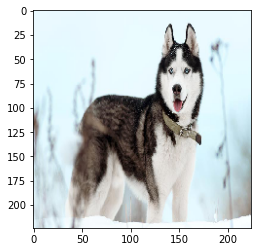

In [14]:
fig3 = plt.figure()
plt.imshow(pic1)

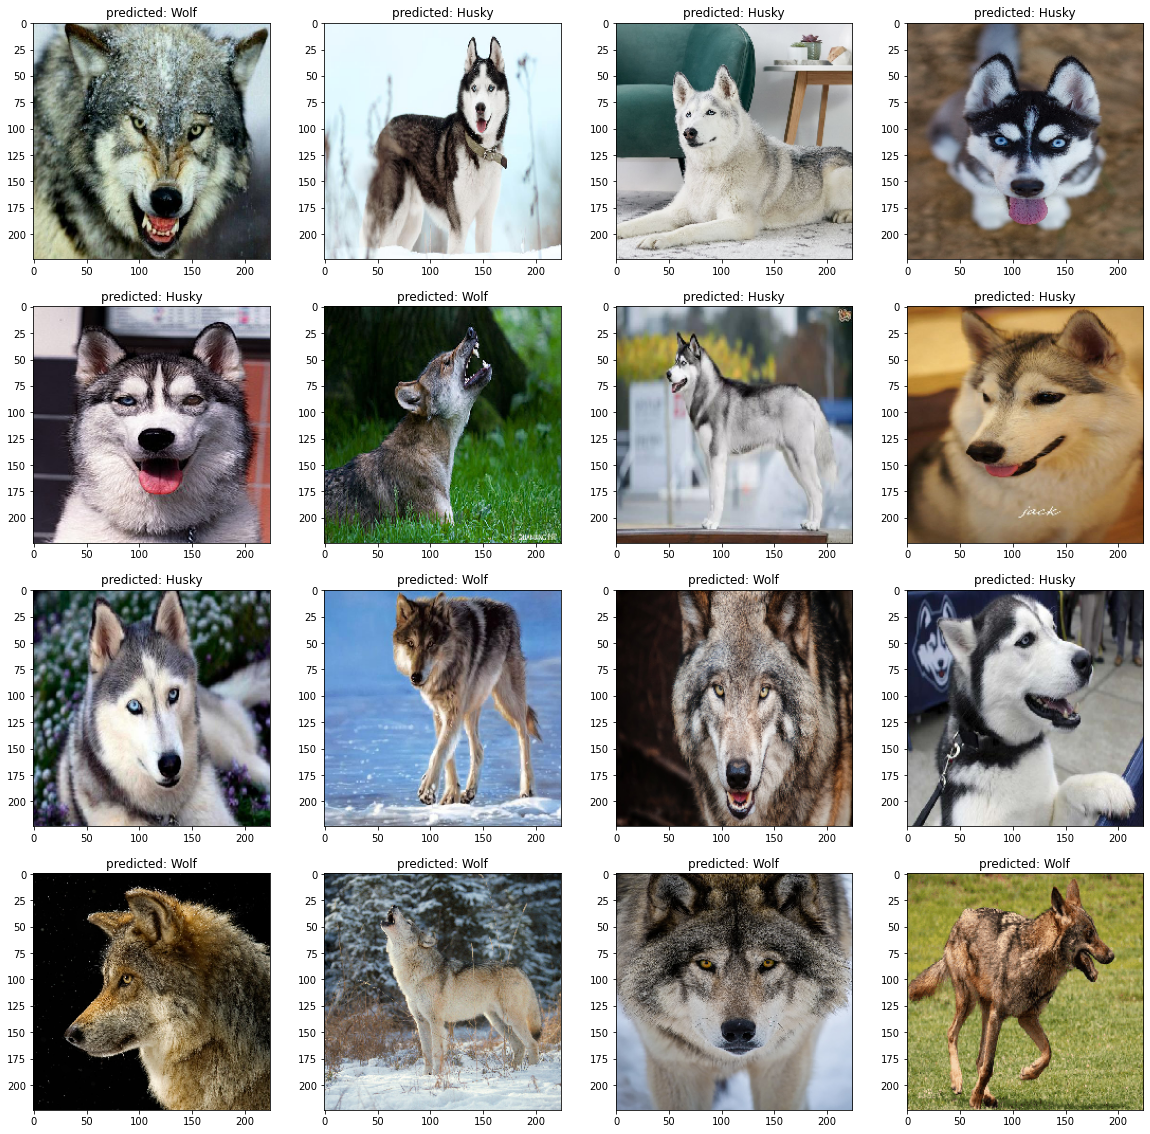

In [15]:
# test the 8 pictures
pics = [p for p in range(1,17)]
fig4 = plt.figure(figsize=(20,20))
img_names=[]
for j in pics:
    img_name = 'photos/test8/'+str(j)+'.jpg'
    img_names.append(img_name)

index = 1
for name in img_names:
    pic = load_img(name,target_size=(224,224))
    pic_array = img_to_array(pic)
    pic_array = np.expand_dims(pic_array, axis=0)
    pic_features = model_vgg.predict(pic_array)
    pic_features = pic_features.reshape(1,7*7*512)
    #mlp
    result = model.predict_classes(pic_features)

    plt.subplot(4,4,index)
    #plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.2,wspace=0.25)
    plt.title("predicted: Husky" if result ==0 else "predicted: Wolf")
    #fig4.tight_layout()
    plt.imshow(pic)
    index += 1


In [16]:
# save model
model.save('arwen.h5')
